## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results,on='Mouse ID')
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_byreg = mouse_results.groupby('Drug Regimen')
tumor_column = mouse_byreg['Tumor Volume (mm3)']
tumor_mean = tumor_column.mean()
tumor_median = tumor_column.median()
tumor_var = tumor_column.var()
tumor_std = tumor_column.std()
tumor_sem = tumor_column.sem()

# Summary table
summary_table = pd.DataFrame({'Mean':tumor_mean,'Median':tumor_median,'Variance':tumor_var,'Standar Deviation':tumor_std,'Standar Error':tumor_sem})

# Format table
summary_table = summary_table.round(2)

# Print
summary_table

,Mean,Median,Variance,Standar Deviation,Standar Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

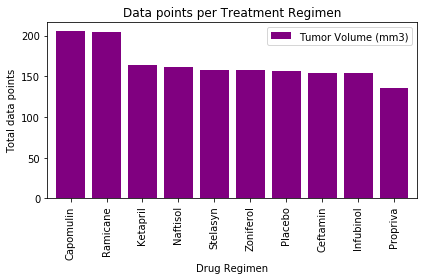

In [30]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_byreg_unique = mouse_byreg.nunique()
mouse_byreg_unique_df = pd.DataFrame(mouse_byreg_unique['Tumor Volume (mm3)']).sort_values(by=['Tumor Volume (mm3)'],ascending=False)
mouse_byreg_unique_df.plot(kind='bar',title='Data points per Treatment Regimen',color='purple',width=.8)
plt.ylabel("Total data points")
plt.tight_layout()
plt.show()


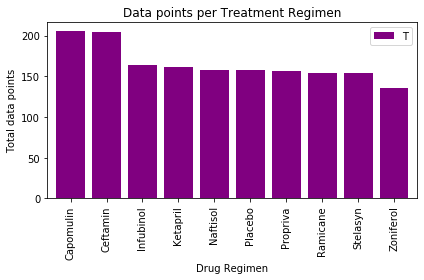

In [35]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(mouse_byreg_unique_df['Tumor Volume (mm3)']))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mouse_byreg_unique_df['Tumor Volume (mm3)'], color = 'purple', align="center")
plt.xticks(tick_locations, pd.DataFrame(mouse_byreg)[0], rotation="vertical")
plt.title("Data points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total data points")
plt.legend("Tumor Volume (mm3)")
plt.xlim(-0.65, len(x_axis)-.35)
plt.tight_layout()
plt.show()

## Pie plots

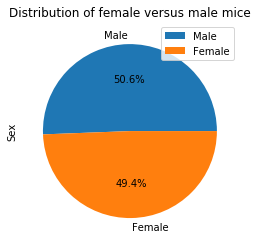

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = pd.DataFrame(mouse_results['Sex'].value_counts())
mouse_sex.plot(kind='pie',y='Sex',title='Distribution of female versus male mice',autopct="%1.1f%%")
plt.show()

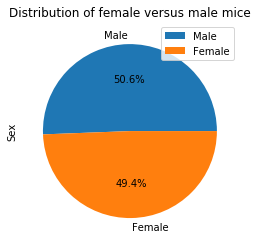

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, labels=['Male','Female'],autopct="%1.1f%%")
plt.legend(['Male','Female'])
plt.title('Distribution of female versus male mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Capomulin
treatment_capo = mouse_results[(mouse_results['Drug Regimen']=='Capomulin'

quartiles_capo = treatment_capo['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
iqr_capo = upperq_capo-lowerq_capo

lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)

outlier_volumes_capo = treatment_capo.loc[(treatment_capo['Tumor Volume (mm3)'] < lower_bound_capo) | (treatment_capo['Tumor Volume (mm3)'] > upper_bound_capo)]

# Ramicane
treatment_rami = mouse_results['Drug Regimen']=='Ramicane'

quartiles_rami = treatment_rami['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_rami = quartiles_rami[0.25]
upperq_rami = quartiles_rami[0.75]
iqr_rami = upperq_rami-lowerq_rami

lower_bound_rami = lowerq_rami - (1.5*iqr_rami)
upper_bound_rami = upperq_rami + (1.5*iqr_rami)

outlier_volumes_rami = treatment_rami.loc[(treatment_rami['Tumor Volume (mm3)'] < lower_bound_rami) | (treatment_rami['Tumor Volume (mm3)'] > upper_bound_rami)]

# Infubinol
treatment_infu = mouse_results['Drug Regimen']=='Infubinol'

quartiles_infu = treatment_infu['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu

lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)

# Ceftamin
treatment_ceft = mouse_results['Drug Regimen']=='Ceftamin'

quartiles_ceft = treatment_ceft['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft

lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

# print(f'Values below {round(lower_bound,2)} could be outliers.'')
# print(f'Values above {round(upper_bound,2)} could be outliers.')

outlier_volumes = treatment_regiments.loc[(treatment_regiments['Tumor Volume (mm3)'] < lower_bound) | (treatment_regiments['Tumor Volume (mm3)'] > upper_bound)]
# print(f'There could be are {len(outlier_volumes)} outliers, base on the IQR information above')


Values below 25.02 could be outliers.
Values above 65.56 could be outliers.
There could be are 16 outliers, base on the IQR information above


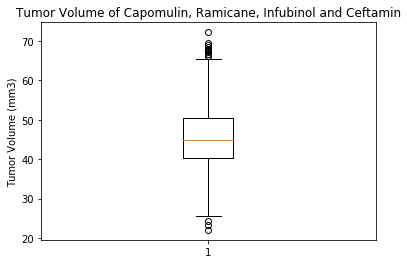

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Capomulin, Ramicane, Infubinol and Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(treatment_regiments['Tumor Volume (mm3)'])
plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen